# Digital Empowerment Pakistan | Task#4 | Animal Classification Using Convolutional Neural Network

## Importing Necessory Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import os
import shutil
from sklearn.metrics import confusion_matrix as cm, classification_report as cr 
from sklearn.model_selection import train_test_split

## Creating Dataset of extracted Images using OS and shutil

In [4]:
path_to_data="./Datasets/"
path_to_cr_data="./Datasets/cropped/"
path_to_data,path_to_cr_data

('./Datasets/', './Datasets/cropped/')

In [8]:
img_dirs=[]
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./Datasets/cropped/cropped_bear',
 './Datasets/cropped/cropped_cat',
 './Datasets/cropped/cropped_dog',
 './Datasets/cropped/cropped_lion']

In [10]:
paths=[]
for img in img_dirs:
     for i in os.listdir(img):
         paths.append(f"{img}/{i}")
paths

['./Datasets/cropped/cropped_bear/bear1.jpg',
 './Datasets/cropped/cropped_bear/bear10.jpg',
 './Datasets/cropped/cropped_bear/bear11.jpg',
 './Datasets/cropped/cropped_bear/bear12.jpg',
 './Datasets/cropped/cropped_bear/bear13.jpg',
 './Datasets/cropped/cropped_bear/bear14.jpg',
 './Datasets/cropped/cropped_bear/bear15.jpg',
 './Datasets/cropped/cropped_bear/bear16.jpg',
 './Datasets/cropped/cropped_bear/bear17.jpg',
 './Datasets/cropped/cropped_bear/bear18.jpg',
 './Datasets/cropped/cropped_bear/bear19.jpg',
 './Datasets/cropped/cropped_bear/bear2.jpg',
 './Datasets/cropped/cropped_bear/bear20.jpg',
 './Datasets/cropped/cropped_bear/bear21.jpg',
 './Datasets/cropped/cropped_bear/bear22.jpg',
 './Datasets/cropped/cropped_bear/bear23.jpg',
 './Datasets/cropped/cropped_bear/bear24.jpg',
 './Datasets/cropped/cropped_bear/bear25.jpg',
 './Datasets/cropped/cropped_bear/bear26.jpg',
 './Datasets/cropped/cropped_bear/bear27.jpg',
 './Datasets/cropped/cropped_bear/bear28.jpg',
 './Datasets/cr

In [11]:
bear=paths[:99]
cat=paths[99:198]
dog=paths[198:297]
lion=paths[297:396]

In [12]:
animal_file_name_dict={'bear':bear,
                      'cat':cat,
                      'dog':dog,
                      "lion":lion}

In [13]:
animal_file_name_dict

{'bear': ['./Datasets/cropped/cropped_bear/bear1.jpg',
  './Datasets/cropped/cropped_bear/bear10.jpg',
  './Datasets/cropped/cropped_bear/bear11.jpg',
  './Datasets/cropped/cropped_bear/bear12.jpg',
  './Datasets/cropped/cropped_bear/bear13.jpg',
  './Datasets/cropped/cropped_bear/bear14.jpg',
  './Datasets/cropped/cropped_bear/bear15.jpg',
  './Datasets/cropped/cropped_bear/bear16.jpg',
  './Datasets/cropped/cropped_bear/bear17.jpg',
  './Datasets/cropped/cropped_bear/bear18.jpg',
  './Datasets/cropped/cropped_bear/bear19.jpg',
  './Datasets/cropped/cropped_bear/bear2.jpg',
  './Datasets/cropped/cropped_bear/bear20.jpg',
  './Datasets/cropped/cropped_bear/bear21.jpg',
  './Datasets/cropped/cropped_bear/bear22.jpg',
  './Datasets/cropped/cropped_bear/bear23.jpg',
  './Datasets/cropped/cropped_bear/bear24.jpg',
  './Datasets/cropped/cropped_bear/bear25.jpg',
  './Datasets/cropped/cropped_bear/bear26.jpg',
  './Datasets/cropped/cropped_bear/bear27.jpg',
  './Datasets/cropped/cropped_bear

In [14]:
class_dict={}
count=0
for animal_name in animal_file_name_dict.keys():
    class_dict[animal_name]=count
    count=count+1
class_dict

{'bear': 0, 'cat': 1, 'dog': 2, 'lion': 3}

# Creatin Dataset

In [15]:
x=[]
y=[]

for animal_name ,training_file in animal_file_name_dict.items():
    for training_image in training_file:
        img=cv2.imread(training_image)
        x.append(img)
        y.append(class_dict[animal_name])

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
y=y.reshape(396,1)

In [18]:
x.shape,y.shape

((396, 140, 140, 3), (396, 1))

## Splitting dataset into training and testing part

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((316, 140, 140, 3), (80, 140, 140, 3), (316, 1), (80, 1))

## Scaling images

In [21]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

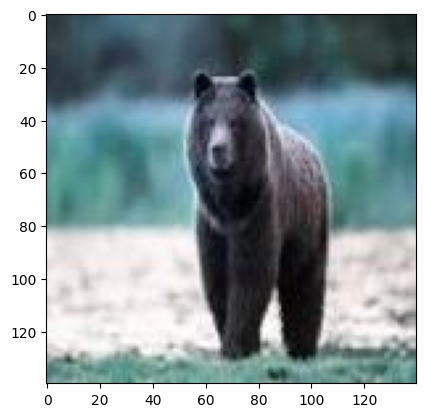

In [66]:
for i in range(0,5):
    plt.imshow(x[18])

In [63]:
data_augmentation=keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

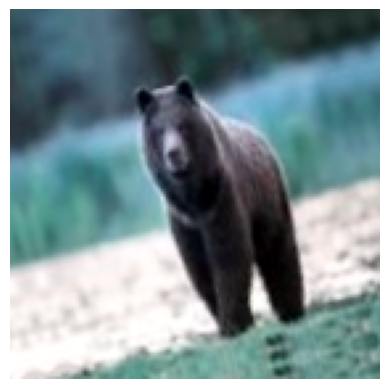

In [67]:
plt.axis('off')
plt.imshow(data_augmentation(x)[18].numpy().astype("uint8"))

# Developing convolutional neural network With Augmentation Layer and dropout layer to handle Over fitting 

In [54]:
cnn=keras.Sequential([

    #CNN
    data_augmentation,
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same",activation='relu',input_shape=(140,140,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(140,140,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',input_shape=(140,140,3)),
    keras.layers.MaxPooling2D((2,2)),
    #Dense
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(316,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# Got An Accuracy of 90 Percent on training dataset

In [56]:
cnn.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 639ms/step - accuracy: 0.2472 - loss: 2.4201
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 661ms/step - accuracy: 0.2810 - loss: 1.5221
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step - accuracy: 0.4554 - loss: 1.2368
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 633ms/step - accuracy: 0.5481 - loss: 1.0961
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 635ms/step - accuracy: 0.5907 - loss: 1.0275
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 634ms/step - accuracy: 0.5859 - loss: 0.8982
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 641ms/step - accuracy: 0.7066 - loss: 0.7790
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 643ms/step - accuracy: 0.6542 - loss: 0.7797
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 635ms/step - accuracy: 0.6723 - loss: 0.7249
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 651ms/step - accuracy: 0.7468 - loss: 0.6541
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 679ms/step - accuracy: 0.7146 - loss: 0.6750
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 631ms/st

# got accuracy of 83 percent on test Dataset

Text(0.5, 1.0, 'Before Augmentation and Dropout layer')

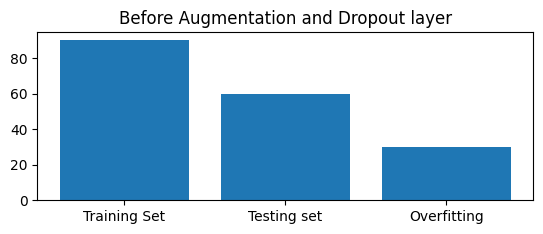

In [93]:
plt.subplot(2,1,2)
plt.bar(["Training Set","Testing set","Overfitting"],[90,60,30])
plt.title("Before Augmentation and Dropout layer")

Text(0.5, 1.0, 'After Augmentation and Dropout layer')

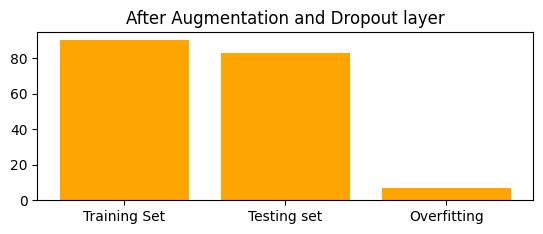

In [95]:
plt.subplot(2,1,2)
plt.bar(["Training Set","Testing set","Overfitting"],[90,83,7],color='orange')
plt.title("After Augmentation and Dropout layer")

In [57]:
cnn.evaluate(x_test_scaled,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8383 - loss: 0.9362


[0.8477811813354492, 0.824999988079071]

In [58]:
predicted=cnn.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [96]:
predicted=[np.argmax(i) for i in predicted]

# Classification Report , Analyzing Precision Recall F1 score 

In [106]:
Classification_report=cr(y_test,predicted)
print(Classification_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.85      0.61      0.71        18
           2       0.72      0.68      0.70        19
           3       0.81      1.00      0.90        26

    accuracy                           0.82        80
   macro avg       0.83      0.81      0.81        80
weighted avg       0.83      0.82      0.82        80



In [108]:
class_0_prec=94
class_0_reca=94
class_0_f1=94

class_1_prec=85
class_1_reca=61
class_1_f1=71

class_2_prec=72
class_2_reca=68
class_2_f1=70

class_3_prec=81
class_3_reca=100
class_3_f1=90

Text(0.5, 1.0, 'Classification Report Class Bear ')

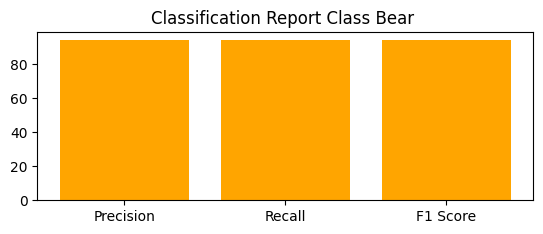

In [111]:
plt.subplot(2,1,2)
plt.bar(["Precision","Recall","F1 Score"],[class_0_prec,class_0_reca,class_0_f1],color='orange')
plt.title("Classification Report Class Bear ")

Text(0.5, 1.0, 'Classification Report Class Cat ')

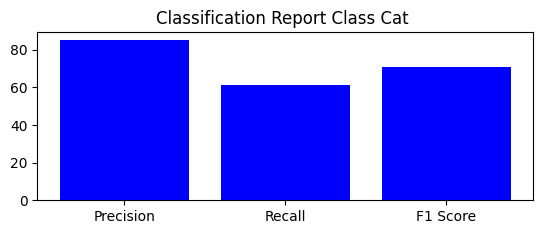

In [112]:
plt.subplot(2,1,2)
plt.bar(["Precision","Recall","F1 Score"],[class_1_prec,class_1_reca,class_1_f1],color='blue')
plt.title("Classification Report Class Cat ")

Text(0.5, 1.0, 'Classification Report Class Dog ')

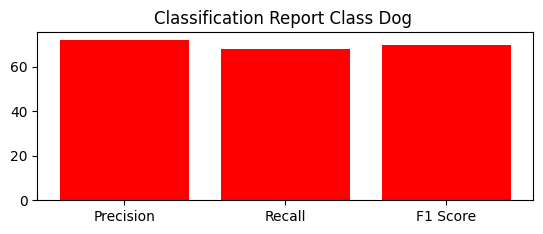

In [113]:
plt.subplot(2,1,2)
plt.bar(["Precision","Recall","F1 Score"],[class_2_prec,class_2_reca,class_2_f1],color='red')
plt.title("Classification Report Class Dog ")

Text(0.5, 1.0, 'Classification Report Class Lion ')

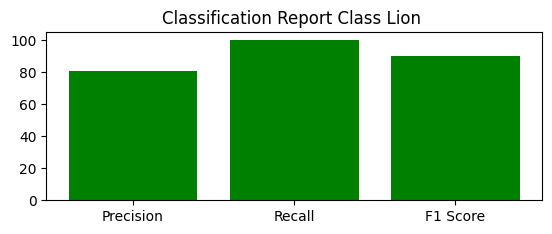

In [114]:
plt.subplot(2,1,2)
plt.bar(["Precision","Recall","F1 Score"],[class_3_prec,class_3_reca,class_3_f1],color='green')
plt.title("Classification Report Class Lion ")

# Confusion Matrix to analyze the accuracy

Text(95.72222222222221, 0.5, 'Truth')

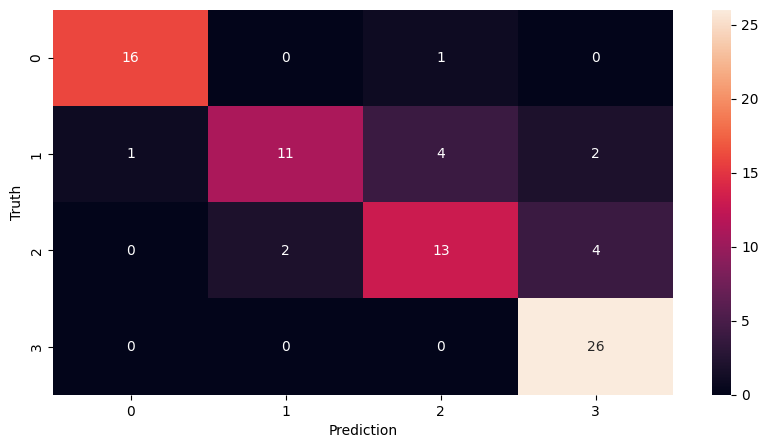

In [61]:
cmm=cm(y_test,predictedd)
plt.figure(figsize=(10,5))
sb.heatmap(cmm,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [42]:
classes=['Bear','Cat','Dog','Lion']

In [43]:
def prediction(path):
    img=cv2.imread(path)
    img_resize=cv2.resize(img,(140,140,))
    img_resize_sh=img_resize.reshape(1,140,140,3)
    img_scaled=img_resize_sh/255
    value=np.argmax(cnn.predict(img_scaled))
    return value

In [45]:
class_dict

{'bear': 0, 'cat': 1, 'dog': 2, 'lion': 3}

In [42]:
import joblib

In [43]:
joblib.dump(cnn,'saved_model.pkl')

['saved_model.pkl']

In [55]:
classes[np.argmax(cnn.predict(x_train_scaled[3].reshape(1,140,140,3)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


'Cat'